In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Fetch the dataset
housing = fetch_california_housing()

# Create a binary target variable (e.g., median value above or below the median)
median_house_value = np.median(housing.target)
binary_target = (housing.target > median_house_value).astype(int)

# Split the data into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, binary_target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Train the logistic regression model
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

# Evaluate the model
accuracy = LR.score(X_valid, y_valid)
print(f"Validation accuracy: {accuracy:.2f}")


Validation accuracy: 0.84


In [6]:
LR_pred = LR.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,LR_pred)

0.8401162790697675

# SVC

In [9]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train,y_train)

SVC_pred = SVC_model.predict(X_test)
accuracy_score(y_test,SVC_pred)

0.8680232558139535

# Decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DT_pred = DT.predict(X_test)

accuracy_score(y_test,DT_pred)

0.82984496124031

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RF_pred = RF.predict(X_test)
accuracy_score(y_test,RF_pred)


0.8939922480620155

In [13]:
LR_ACC = accuracy_score(y_test,LR_pred)
SVC_ACC = accuracy_score(y_test,SVC_pred)
DT_ACC = accuracy_score(y_test,DT_pred)
RF_ACC = accuracy_score(y_test,RF_pred)

In [15]:
[LR_ACC, SVC_ACC, DT_ACC, RF_ACC]

[0.8401162790697675, 0.8680232558139535, 0.82984496124031, 0.8939922480620155]

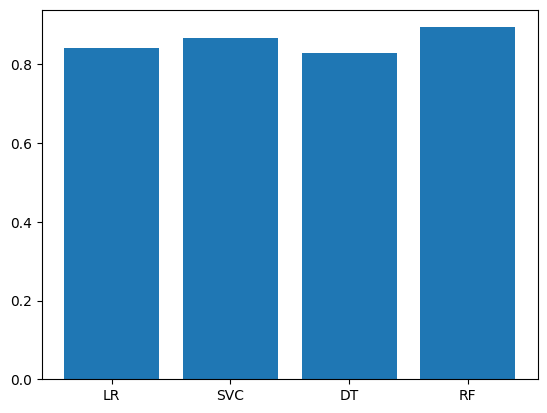

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots()
ax.set_xticks(np.arange(4))
ax.set_xticklabels(["LR","SVC","DT","RF"])
plt.bar(range(4),[LR_ACC, SVC_ACC, DT_ACC, RF_ACC])
plt.show()

# Ensemble of models

In [26]:
from sklearn.ensemble import VotingClassifier
voter = VotingClassifier(estimators=[('lr',LR),('RF',RF), ('DT',DT)],voting='soft')
voter.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('RF', RandomForestClassifier()),
                             ('DT', DecisionTreeClassifier())],
                 voting='soft')

In [27]:
voter_pred = voter.predict(X_test)
accuracy_score(y_test,voter_pred)

0.8593023255813953

In [30]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(
    DecisionTreeClassifier(), 
    n_estimators=100, 
    random_state=42
)
bagging_model.fit(X_train, y_train)

# Evaluate the model
valid_score = bagging_model.score(X_valid, y_valid)
test_score = bagging_model.score(X_test, y_test)

print(f"Validation R^2 score: {valid_score:.2f}")
print(f"Test R^2 score: {test_score:.2f}")

Validation R^2 score: 0.65
Test R^2 score: 0.65
